## Question

TMDB Box Office Prediction:

Description: In this competition, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

You can also collect other public data to make the prediction.

Competition Length: today -> Nov 30th

Prepare your code:

1. Download the data.

2. Preprocess the data into a clean format.

3. Train your model and run prediction on the test set

4. Submit your solution to Kaggle for evaluation.

In [1720]:
# Solve this question with linear regression => https://www.kaggle.com/competitions/tmdb-box-office-prediction/overview

# Importing the libraries
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import re

# Random seed
np.random.seed(0)





In [1721]:
# Importing the train_data
train_data = pd.read_csv('./data/train.csv')
# train_data = train_data.drop(['id'], axis=1)
test_data = pd.read_csv('./data/test.csv')
# test_data = test_data.drop(['id'], axis=1)

# Replace belongs_to_collection with {} using lambda function
train_data['belongs_to_collection'] = train_data['belongs_to_collection'].apply(lambda x: eval(x) if pd.notnull(x) else {})
test_data['belongs_to_collection'] = test_data['belongs_to_collection'].apply(lambda x: eval(x) if pd.notnull(x) else {})



train_data.head(10)



,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,{},8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,{},14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,{},0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'iso_63

In [1722]:
test_data.shape

(4398, 22)

## Generes

In [1723]:
# Genres
train_data['genres'] = train_data['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])
train_data['genres'] = train_data['genres'].apply(lambda x: [i['name'] for i in x])
test_data['genres'] = test_data['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data['genres'] = test_data['genres'].apply(lambda x: [i['name'] for i in x])



train_data.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,{},8000000,"[Animation, Adventure, Family]",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,{},14000000,"[Horror, Thriller]",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,{},0,[Documentary],NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[Action, Comedy, Music, Family, Adventure]",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_i

# DATA PREPROCESSING


In [1724]:
train_data['genres'].value_counts()

[Drama]                                         266
[Comedy]                                        186
[Drama, Romance]                                108
[Comedy, Romance]                                88
[Comedy, Drama]                                  85
                                               ... 
[Adventure, Action, War]                          1
[Comedy, Drama, Foreign, Romance]                 1
[Adventure, Drama, Fantasy, Family, Mystery]      1
[Comedy, Drama, History, Mystery]                 1
[Thriller, Action, Mystery]                       1
Name: genres, Length: 873, dtype: int64

In [1725]:
train_data.isnull().sum()

id                          0
belongs_to_collection       0
budget                      0
genres                      0
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [1726]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  3000 non-null   object 
 2   budget                 3000 non-null   int64  
 3   genres                 3000 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [1727]:
train_data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [1728]:
train_data.shape

(3000, 23)

## Belong to Collection


In [1729]:
# Fill {} values from title of movie

for index,row in train_data.iterrows():
    if row["belongs_to_collection"] != {}:
        for i in row["belongs_to_collection"]:
            train_data["belongs_to_collection"][index] = i["name"]
    else:
        title = row["title"]
        if (title.split()[0].isdigit()) and (len(title.split()) >= 1 ) :
            train_data["belongs_to_collection"][index] = (title.strip())+" Collection"
        else:
            regex = r"([a-zA-Z \d \, \[ \] \' \. \& \( \) \_ \! \? \x00-\x7F]*)"
            train_data["belongs_to_collection"][index] = ((re.findall(regex,title))[0]) + " Collection"

train_data[["belongs_to_collection","title"]].head(10)

/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/3166735102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["belongs_to_collection"][index] = i["name"]
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/3166735102.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["belongs_to_collection"][index] = ((re.findall(regex,title))[0]) + " Collection"
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/3166735102.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

,belongs_to_collection,title
0,Hot Tub Time Machine Collection,Hot Tub Time Machine 2
1,The Princess Diaries Collection,The Princess Diaries 2: Royal Engagement
2,Whiplash Collection,Whiplash
3,Kahaani Collection,Kahaani
4,Marine Boy Collection,Marine Boy
5,Pinocchio and the Emperor of the Night Collection,Pinocchio and the Emperor of the Night
6,The Possession Collection,The Possession
7,Control Room Collection,Control Room
8,The Muppet Collection,Muppet Treasure Island
9,A Mighty Wind Collection,A Mighty Wind


In [1730]:

for index,row in test_data.iterrows():
    if row["belongs_to_collection"] != {}:
        for i in row["belongs_to_collection"]:
            test_data["belongs_to_collection"][index] = i["name"]
    else:
        title = str(row["title"])
        print(title)
        if (title.split()[0].isdigit()) and (len(title.split()) >= 1 ) :
            test_data["belongs_to_collection"][index] = (title.strip())+" Collection"
        else:
            regex = r"([a-zA-Z \d \, \[ \] \' \. \& \( \) \_ \! \? \x00-\x7F]*)"
            test_data["belongs_to_collection"][index] = ((re.findall(regex,title))[0]) + " Collection"

test_data[["belongs_to_collection","title"]].head(10)

/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/622766131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["belongs_to_collection"][index] = i["name"]
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/622766131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["belongs_to_collection"][index] = ((re.findall(regex,title))[0]) + " Collection"
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/622766131.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

Attack of the 50 Foot Woman
Addicted to Love
Incendies
Inside Deep Throat
SubUrbia
Three
The Tigger Movie
Becoming Jane
Cruel World
Girlhood
Raising Victor Vargas
The Brothers Bloom
Beautiful Boy
Transcendence
All That Jazz
Titanic
Very Bad Things
My Best Friend's Girl
Broken Bridges
Suspect Zero
The Adderall Diaries
Cape Fear
The New Adventures of Pippi Longstocking
The Accountant
American Outlaws
Shortbus
Rang De Basanti
I Married a Strange Person!
Ayurveda: Art of Being
Obvious Child
Predestination
The Boy
Ernest & Celestine
When the Wind Blows
Young Adult
Best Seller
Barbecue
The Comfort of Strangers
To Have and Have Not
Running Scared
The Immortals
Boat Trip
Beautiful Losers
Baghban
The Age of Innocence
The Stoker
Jade
Robin Hood
Repentance
The Negotiator
The Fall
Salton Sea
Dragon Blade
What's Your Number?
Arthur
XX
Rango
The Impostors
Ken Park
Inception
Blind Dating
Dangerously Close
The Perks of Being a Wallflower
Aftermath
Ice Princess
The Conversation
Tomboy
Sorority Row
The 

,belongs_to_collection,title
0,Pokémon Collection,Pokémon: The Rise of Darkrai
1,Attack of the 50 Foot Woman Collection,Attack of the 50 Foot Woman
2,Addicted to Love Collection,Addicted to Love
3,Incendies Collection,Incendies
4,Inside Deep Throat Collection,Inside Deep Throat
5,SubUrbia Collection,SubUrbia
6,Three Collection,Three
7,The Tigger Movie Collection,The Tigger Movie
8,Becoming Jane Collection,Becoming Jane
9,Toy Story Collection,Toy Story 2


In [1731]:
test_data[["belongs_to_collection","title"]].head(10)

,belongs_to_collection,title
0,Pokémon Collection,Pokémon: The Rise of Darkrai
1,Attack of the 50 Foot Woman Collection,Attack of the 50 Foot Woman
2,Addicted to Love Collection,Addicted to Love
3,Incendies Collection,Incendies
4,Inside Deep Throat Collection,Inside Deep Throat
5,SubUrbia Collection,SubUrbia
6,Three Collection,Three
7,The Tigger Movie Collection,The Tigger Movie
8,Becoming Jane Collection,Becoming Jane
9,Toy Story Collection,Toy Story 2


### Budget 

In [1732]:
train_data['budget'].value_counts()

0           812
15000000     72
40000000     71
25000000     71
5000000      68
           ... 
747000        1
1119000       1
65000         1
1750000       1
1135654       1
Name: budget, Length: 406, dtype: int64

In [1733]:
# Replace 0 budget with mean of budget
train_data['budget'] = train_data['budget'].replace(0, train_data['budget'].mean())
test_data['budget'] = test_data['budget'].replace(0, test_data['budget'].mean())

train_data['budget'].head(10)

0    14000000.00
1    40000000.00
2     3300000.00
3     1200000.00
4    22531334.11
5     8000000.00
6    14000000.00
7    22531334.11
8    22531334.11
9     6000000.00
Name: budget, dtype: float64

## Set the release date to format


In [1734]:
train_data["release_date"].sample(10)

311     5/18/12
1025    11/6/13
1587    1/30/91
2941    9/20/02
2980     2/4/16
2078     3/6/87
2281    4/10/98
720      8/2/86
1537     2/2/10
2493    1/26/03
Name: release_date, dtype: object

In [1735]:
x = train_data['release_date'].iloc[2322]
x

'6/28/11'

In [1736]:
# train_data["release_date"] = pd.to_datetime(train_data["release_date"])
# # print(train_data["release_date"].iloc[2322].dt.year)
# train_data["release_year"] = train_data["release_date"].dt.year
# train_data["release_month"] = train_data["release_date"].dt.month
# train_data["release_day"] = train_data["release_date"].dt.day

# ################
# test_data["release_date"] = pd.to_datetime(test_data["release_date"])
# test_data["release_year"] = test_data["release_date"].dt.year
# test_data["release_month"] = test_data["release_date"].dt.month
# test_data["release_day"] = test_data["release_date"].dt.day


In [1737]:
#Since only last two digits of year are provided, this is the correct way of getting the year.
train_data[['release_month','release_day','release_year']]=train_data['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
train_data.loc[ (train_data['release_year'] <= 19) & (train_data['release_year'] < 100), "release_year"] += 2000
train_data.loc[ (train_data['release_year'] > 19)  & (train_data['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train_data['release_date']) 
train_data['release_dayofweek'] = releaseDate.dt.dayofweek
train_data['release_quarter'] = releaseDate.dt.quarter


#####

test_data[['release_month','release_day','release_year']]=test_data['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
test_data.loc[ (test_data['release_year'] <= 19) & (test_data['release_year'] < 100), "release_year"] += 2000
test_data.loc[ (test_data['release_year'] > 19)  & (test_data['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(test_data['release_date'])
test_data['release_dayofweek'] = releaseDate.dt.dayofweek
test_data['release_quarter'] = releaseDate.dt.quarter


In [1738]:
train_data['release_year'].value_counts()
# Select 2030 year movies from release_year and print release year and revenue
train_data.loc[train_data['release_year'] == 2030][['release_year', 'release_date', 'revenue']]

,release_year,release_date,revenue


In [1739]:
train_data[train_data["production_companies"] == {}]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,title,Keywords,cast,crew,revenue,release_month,release_day,release_year,release_dayofweek,release_quarter


In [1740]:
train_data["release_date"].head(10)

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
5      8/6/87
6     8/30/12
7     1/15/04
8     2/16/96
9     4/16/03
Name: release_date, dtype: object

## Spoken Languages


In [1741]:
train_data["spoken_languages"] = train_data["spoken_languages"].apply(lambda x: train_data["spoken_languages"].mode()[0] if x=={} else x)
test_data["spoken_languages"] = test_data["spoken_languages"].apply(lambda x: test_data["spoken_languages"].mode()[0] if x=={} else x)

In [1742]:
train_data["spoken_languages"].head(10)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
5             [{'iso_639_1': 'en', 'name': 'English'}]
6             [{'iso_639_1': 'en', 'name': 'English'}]
7    [{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...
8             [{'iso_639_1': 'en', 'name': 'English'}]
9             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [1743]:
# Convert sponken_languages from string to list

train_data["spoken_languages"] = train_data["spoken_languages"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["spoken_languages"] = test_data["spoken_languages"].apply(lambda x: eval(x) if pd.notnull(x) else [])
list_of_languages = list(train_data['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

train_data["languages_count"] = train_data["spoken_languages"].apply(lambda x: len(x))
train_data['all_languages'] = train_data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train_data['language_' + g] = train_data['all_languages'].apply(lambda x: 1 if g in x else 0)
test_data["languages_count"] = test_data["spoken_languages"].apply(lambda x: len(x))
test_data['all_languages'] = test_data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test_data['language_' + g] = test_data['all_languages'].apply(lambda x: 1 if g in x else 0)

In [1744]:
train_data[["spoken_languages","languages_count"]]

,spoken_languages,languages_count
0,"[{'iso_639_1': 'en', 'name': 'English'}]",1
1,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2,"[{'iso_639_1': 'en', 'name': 'English'}]",1
3,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",2
4,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",1
...,...,...
2995,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2996,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",1
2997,"[{'iso_639_1': 'en', 'name': 'English'}]",1
2998,"[{'iso_639_1': 'en', 'name': 'English'}]",1


## Keywords

In [1745]:
# Replace null with [] in keywords
train_data["Keywords"] = train_data["Keywords"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["Keywords"] = test_data["Keywords"].apply(lambda x: eval(x) if pd.notnull(x) else [])

train_data["Keywords"].head(10)

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                   []
5                                                   []
6                                                   []
7    [{'id': 917, 'name': 'journalism'}, {'id': 163...
8    [{'id': 2041, 'name': 'island'}, {'id': 4418, ...
9    [{'id': 11800, 'name': 'mockumentary'}, {'id':...
Name: Keywords, dtype: object

In [1746]:

# Check type of Keywords
train_data["Keywords"].head(10)

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                   []
5                                                   []
6                                                   []
7    [{'id': 917, 'name': 'journalism'}, {'id': 163...
8    [{'id': 2041, 'name': 'island'}, {'id': 4418, ...
9    [{'id': 11800, 'name': 'mockumentary'}, {'id':...
Name: Keywords, dtype: object

In [1747]:
train_data["Keywords_count"] = train_data["Keywords"].apply(lambda x: len(x))
#######3
test_data["Keywords_count"] = test_data["Keywords"].apply(lambda x: len(x))

In [1748]:
train_data[["Keywords","Keywords_count"]]

,Keywords,Keywords_count
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",4
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",4
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",12
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",7
4,[],0
...,...,...
2995,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...",19
2996,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...",6
2997,"[{'id': 441, 'name': 'assassination'}, {'id': ...",14
2998,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...",22


## Cast and Crew

In [1749]:
# Deal with null values in cast and crew
train_data["cast"] = train_data["cast"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["cast"] = test_data["cast"].apply(lambda x: eval(x) if pd.notnull(x) else [])

train_data["cast"].head(10)

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
5    [{'cast_id': 6, 'character': 'Pinocchio (voice...
6    [{'cast_id': 23, 'character': 'Clyde', 'credit...
7    [{'cast_id': 2, 'character': 'Himself', 'credi...
8    [{'cast_id': 1, 'character': 'Long John Silver...
9    [{'cast_id': 24, 'character': 'Jonathan Steinb...
Name: cast, dtype: object

In [1750]:
# Check null values in crew
train_data["crew"] = train_data["crew"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["crew"] = test_data["crew"].apply(lambda x: eval(x) if pd.notnull(x) else [])

train_data["crew"].head(10)


0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
5    [{'credit_id': '52fe46f49251416c9106558b', 'de...
6    [{'credit_id': '52fe4981c3a368484e12ee29', 'de...
7    [{'credit_id': '52fe47a69251416c750a0daf', 'de...
8    [{'credit_id': '52fe43c89251416c7501deb3', 'de...
9    [{'credit_id': '52fe45609251416c750545b3', 'de...
Name: crew, dtype: object

In [1751]:
train_data.isnull().sum()

id                          0
belongs_to_collection       0
budget                      0
genres                      0
homepage                 2054
                         ... 
language_فارسی              0
language_Tiếng Việt         0
language_اردو               0
language_Română             0
Keywords_count              0
Length: 61, dtype: int64

## Production Companies and counteries

In [1752]:
# Remove null values from Production_companies and Production_countries

train_data["production_companies"] = train_data["production_companies"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["production_companies"] = test_data["production_companies"].apply(lambda x: eval(x) if pd.notnull(x) else [])

train_data["production_countries"] = train_data["production_countries"].apply(lambda x: eval(x) if pd.notnull(x) else [])
test_data["production_countries"] = test_data["production_countries"].apply(lambda x: eval(x) if pd.notnull(x) else [])


In [1753]:
# filler = train_data["production_companies"].value_counts().index.to_list()[1]
# train_data["production_companies"] = train_data["production_companies"].apply(lambda x: filler if x=={} else x)
# fillert = test_data["production_companies"].value_counts().index.to_list()[1]
# test_data["production_companies"] = test_data["production_companies"].apply(lambda x: fillert if x=={} else x)

In [1754]:
list_of_companies = list(train_data['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_data["companies_count"] = train_data["production_companies"].apply(lambda x: len(x))
train_data['all_production_companies'] = train_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train_data['production_company_' + g] = train_data['all_production_companies'].apply(lambda x: 1 if g in x else 0)
test_data["companies_count"] = test_data["production_companies"].apply(lambda x: len(x))
test_data['all_production_companies'] = test_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test_data['production_company_' + g] = test_data['all_production_companies'].apply(lambda x: 1 if g in x else 0)

In [1755]:
train_data[["production_companies","companies_count"]]

,production_companies,companies_count
0,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",3
1,"[{'name': 'Walt Disney Pictures', 'id': 2}]",1
2,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",3
3,[],0
4,[],0
...,...,...
2995,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",2
2996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...",2
2997,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",3
2998,"[{'name': 'Jersey Films', 'id': 216}, {'name':...",2


In [1756]:
train_data.sample(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films
2117,2118,American Adobo Collection,3.440000e+02,"[Comedy, Romance]",http://www.americanadobo.com,tt0294289,en,American Adobo,The everyday struggles of people trying to bri...,0.158651,...,0,0,0,0,0,0,0,0,0,0
2802,2803,Harry Potter Collection,1.000000e+08,"[Adventure, Fantasy, Family]",NaN,tt0295297,en,Harry Potter and the Chamber of Secrets,"Ignoring threats to his life, Harry returns to...",29.741452,...,0,0,0,0,0,0,0,0,0,0
2522,2523,Evil Dead Collection,3.600000e+06,"[Horror, Comedy, Fantasy]",NaN,tt0092991,en,Evil Dead II,Ash Williams and his girlfriend Linda find a l...,13.520764,...,0,0,0,0,0,0,0,0,0,0
1828,1829,Murder by Numbers Collection,5.000000e+07,"[Crime, Drama, Thriller]",NaN,tt0264935,en,Murder by Numbers,Tenacious homicide detective Cassie Mayweather...,9.645801,...,0,0,0,0,0,0,0,0,0,0
206,207,One False Move Collection,2.253133e+07,"[Crime, Drama, Thriller]",NaN,tt0102592,en,One False Move,"Following a series of drug deals and murders, ...",3.143250,...,0,0,0,0,0,0,0,0,0,0
2738,2739,Atlantis Collection,1.200000e+08,"[Animation, Family, Adventure, Science Fiction]",http://www.disney.com/atlantis,tt0230011,en,Atlantis: The Lost Empire,The world's most highly qualified crew of arch...,10.901602,...,0,0,0,0,0,0,0,0,0,0
2300,2301,This is England Collection,2.380000e+06,"[Drama, Crime]",http://www.thisisenglandmovie.co.uk/,tt0480025,en,This Is England,A story about a troubled boy growing up in Eng...,2.514638,...,0,0,0,0,0,0,0,0,0,0
292,293,Unbroken Collection,6.500000e+07,"[Drama, War]",http://www.unbrokenfilm.com/,tt1809398,en,Unbroken,"A chronicle of the life of Louis Zamperini, an...",10.543955,...,0,0,0,0,0,0,0,0,0,0
593,594,Before... Collection,3.000000e+06,"[Romance, Drama]",NaN,tt2209418,en,Before Midnight,We meet Jesse and Celine nine years on in Gree...,11.303240,...,0,0,0,0,0,0,0,0,0,0
1749,1750,Standing Tall Collection,5.000000e+06,[Drama],NaN,tt3791302,fr,La Tête haute,The film tells the story of Malony and his edu...,4.206655,...,0,0,0,0,0,0,0,0,0,0


In [1757]:
# Do same to production_countries

list_of_countries = list(train_data['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train_data["countries_count"] = train_data["production_countries"].apply(lambda x: len(x))
train_data['all_production_countries'] = train_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(30)]
for g in top_countries:
    train_data['production_country_' + g] = train_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
test_data["countries_count"] = test_data["production_countries"].apply(lambda x: len(x))
test_data['all_production_countries'] = test_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test_data['production_country_' + g] = test_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
    
train_data[["production_countries","countries_count"]]
train_data.sample(10)


/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/4069189665.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['production_country_' + g] = test_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/4069189665.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['production_country_' + g] = test_data['all_production_countries'].apply(lambda x: 1 if g in x else 0)
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/i

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,production_country_Hungary,production_country_United Arab Emirates,production_country_Austria,production_country_Switzerland,production_country_Romania
31,32,Cach Collection,22531334.11,"[Mystery, Drama, Thriller]",http://www.cache-derfilm.at,tt0387898,fr,Caché,A married couple is terrorized by a series of ...,5.695860,...,0,0,0,0,0,0,0,1,0,0
2780,2781,Sudden Death Collection,35000000.00,"[Action, Adventure, Thriller]",NaN,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.231580,...,0,0,0,0,0,0,0,0,0,0
1917,1918,The Merry Widow Collection,592.00,"[Romance, Drama]",NaN,tt0016104,en,The Merry Widow,Prince Danilo falls in love with dancer Sally ...,0.286719,...,0,0,0,0,0,0,0,0,0,0
2632,2633,Red Planet Collection,80000000.00,"[Thriller, Action, Science Fiction]",NaN,tt0199753,en,Red Planet,Astronauts search for solutions to save a dyin...,8.534176,...,0,0,0,0,0,0,0,0,0,0
104,105,Recep İvedik Serisi,22531334.11,[Comedy],NaN,tt3477064,tr,Recep İvedik 4,Recep Ivedik coaches the children football tea...,1.590383,...,0,0,0,0,0,0,0,0,0,0
2900,2901,Rita's Last Fairy Tale Collection,200000.00,[],http://ritaslastfairytale.ru/,tt1766044,en,Poslednyaya skazka Rity,The film speaks about universal themes of love...,0.560685,...,0,0,0,0,0,0,0,0,0,0
869,870,Tristan & Isolde Collection,31000000.00,[Drama],NaN,tt0375154,en,Tristan & Isolde,An affair between the second in line to Britai...,15.672195,...,1,0,0,0,0,0,0,0,0,0
2758,2759,Miranda Collection,784170.00,"[Comedy, Drama, Fantasy, Romance, Science Fict...",NaN,tt0040597,en,Miranda,"A young married physician discovers a mermaid,...",0.578456,...,0,0,0,0,0,0,0,0,0,0
1565,1566,The Big Short Collection,28000000.00,"[Comedy, Drama]",http://www.thebigshortmovie.com/,tt1596363,en,The Big Short,The men who made millions from a global econom...,13.143061,...,0,0,0,0,0,0,0,0,0,0
1915,1916,The Stroller Strategy Collection,22531334.11,[Comedy],NaN,tt2520516,fr,La stratégie de la poussette,When Thomas Platz is suddenly made the guardia...,2.156134,...,0,0,0,0,0,0,0,0,0,0


In [1758]:
train_data[['production_countries','countries_count']].head(10)

,production_countries,countries_count
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
3,"[{'iso_3166_1': 'IN', 'name': 'India'}]",1
4,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",1
5,[],0
6,"[{'iso_3166_1': 'US', 'name': 'United States o...",2
7,[],0
8,"[{'iso_3166_1': 'US', 'name': 'United States o...",1
9,"[{'iso_3166_1': 'US', 'name': 'United States o...",1


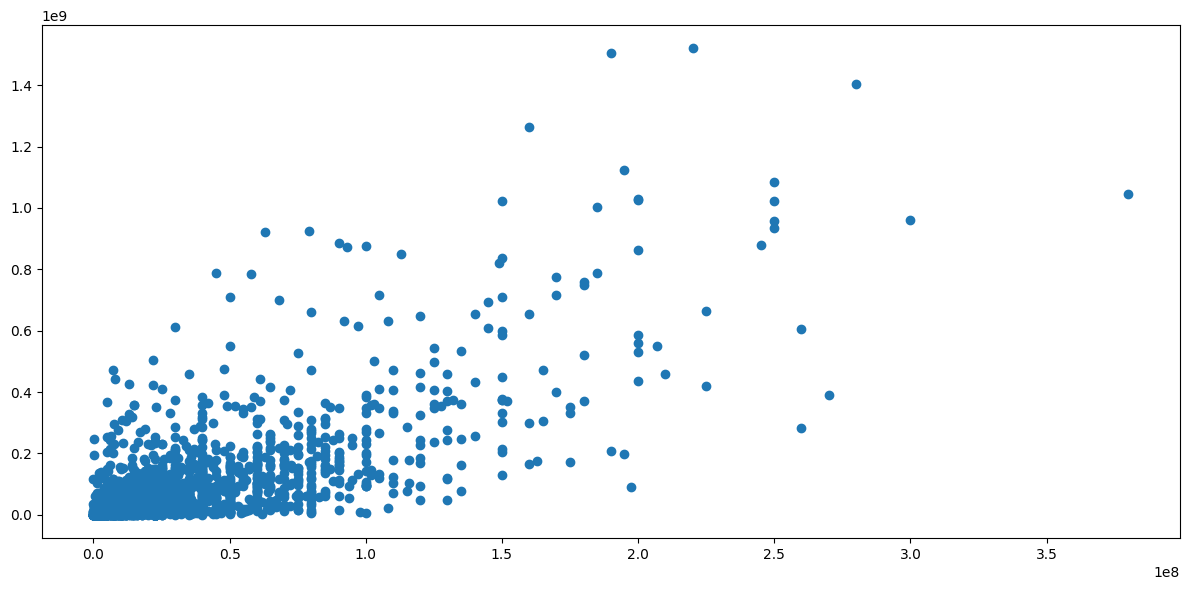

In [1759]:
plt.figure(figsize=(12,6))
plt.scatter(train_data["budget"],train_data["revenue"])
plt.tight_layout()

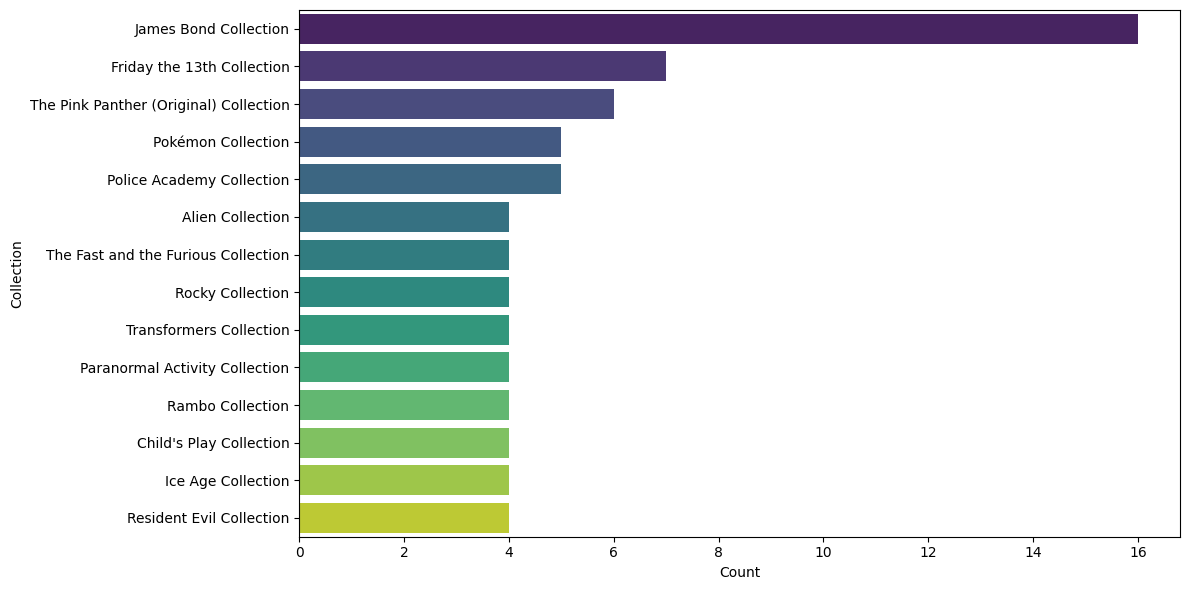

In [1760]:
belongs_to_collection_data = train_data["belongs_to_collection"].value_counts()[:14].to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y=belongs_to_collection_data["index"],x=belongs_to_collection_data["belongs_to_collection"],palette="viridis")
plt.xlabel("Count")
plt.ylabel("Collection")
plt.tight_layout()

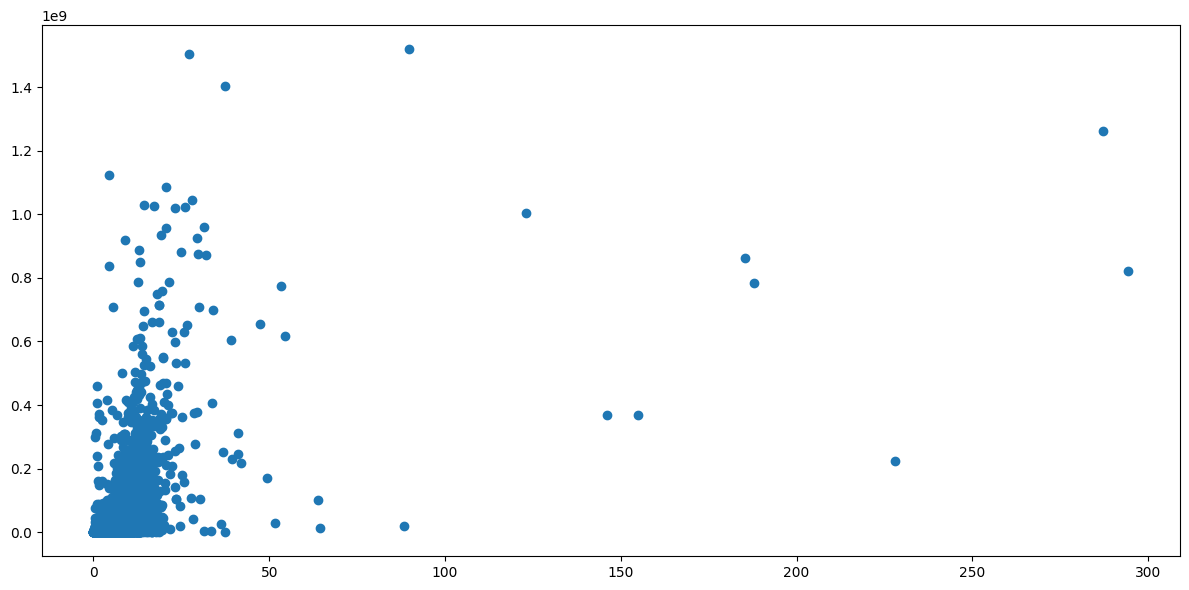

In [1761]:
plt.figure(figsize=(12,6))
plt.scatter(train_data["popularity"],train_data["revenue"])
plt.tight_layout()

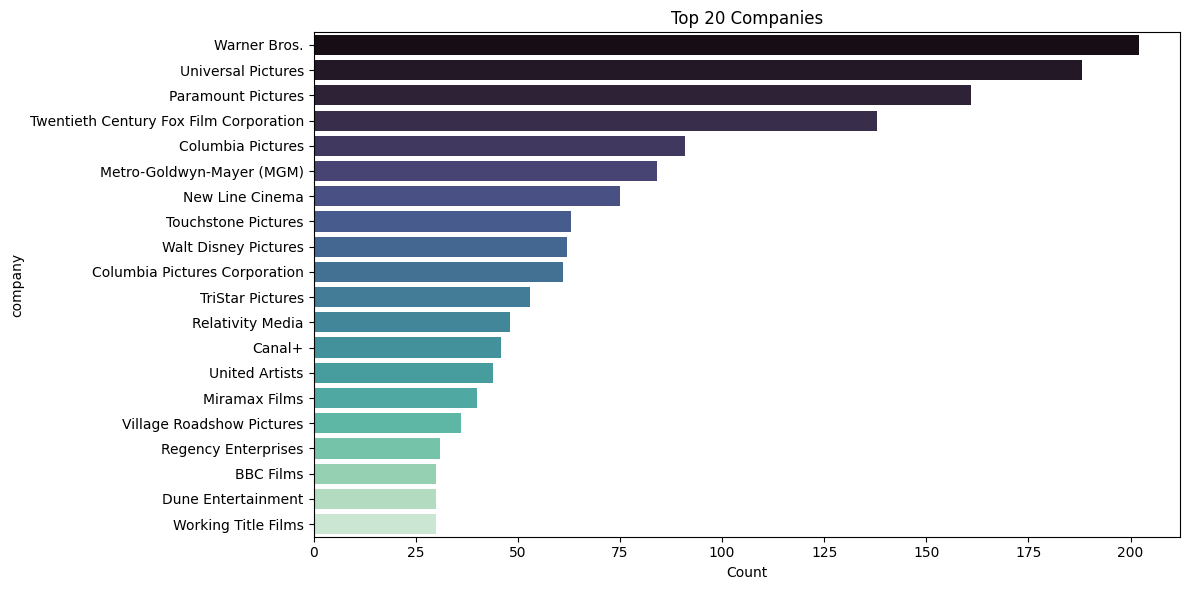

In [1762]:
companies_count = (train_data["production_companies"].apply(lambda x: [i["name"] for i in x]))
companies_count = Counter([j for i in companies_count for j in i])
companies_count = companies_count.most_common()

companies_count = dict(companies_count)
company_data = pd.DataFrame({"company":companies_count.keys(),"Values":companies_count.values()})
plt.figure(figsize=(12,6))
sns.barplot(y = company_data[:20]["company"],x = company_data[:20]["Values"],palette="mako")
plt.title("Top 20 Companies")
plt.xlabel("Count")
plt.tight_layout()


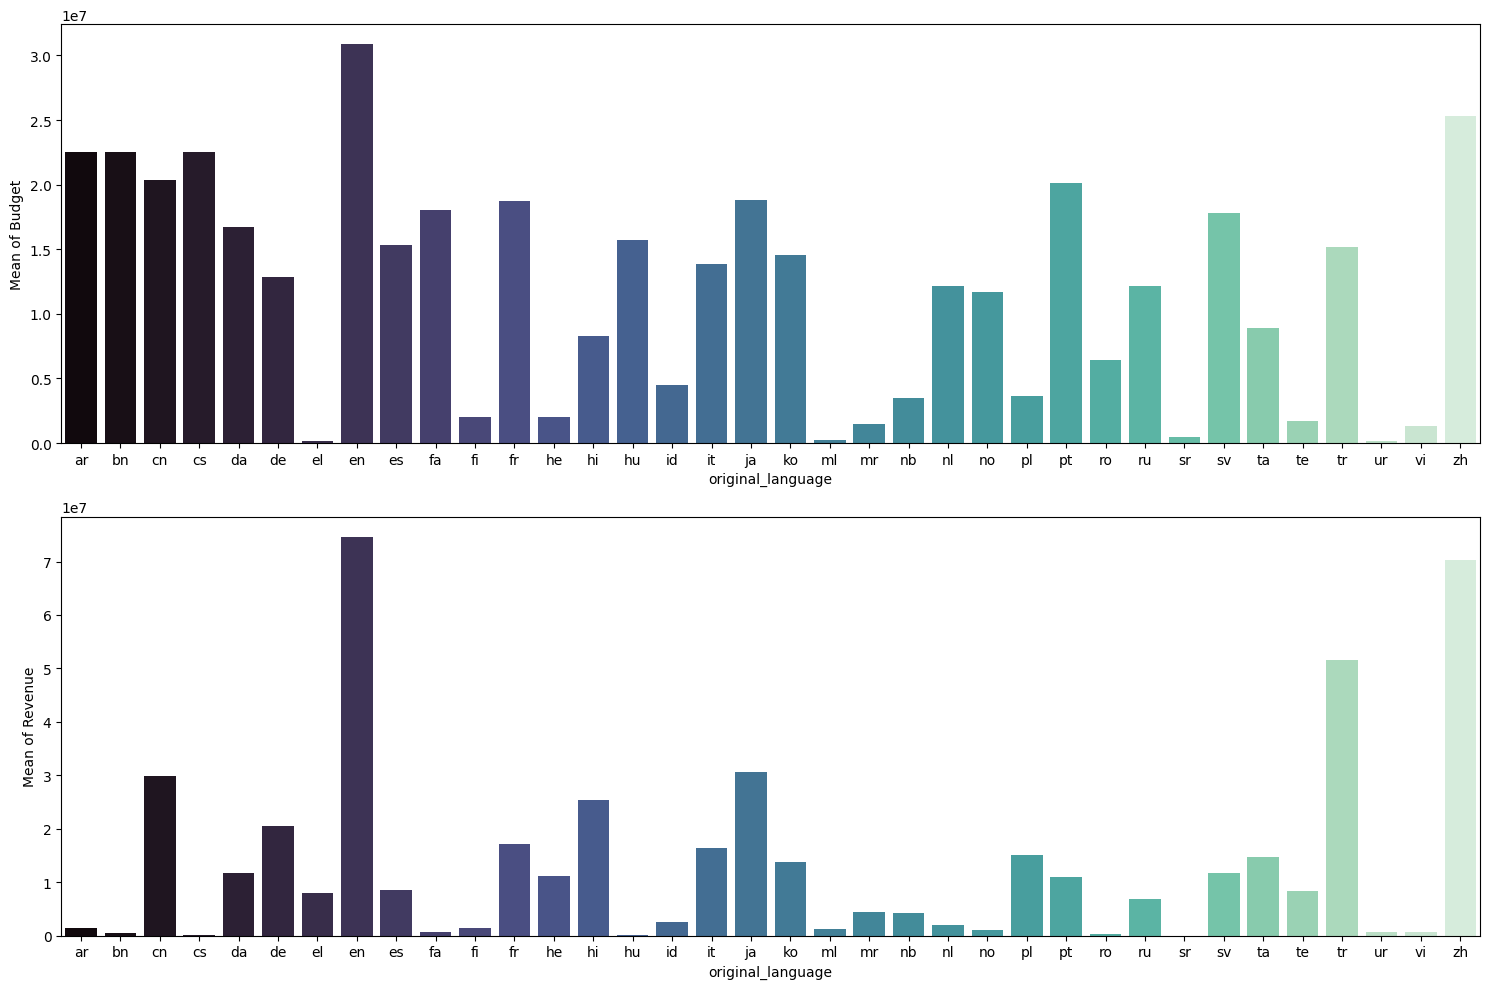

In [1763]:
original_language_budget = train_data.groupby("original_language")[["budget","revenue"]].mean().reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=original_language_budget["original_language"],y=original_language_budget["budget"],ax=ax[0],palette="mako")
ax1.set_ylabel("Mean of Budget")
ax2 = sns.barplot(x=original_language_budget["original_language"],y=original_language_budget["revenue"],ax=ax[1],palette="mako")
ax2.set_ylabel("Mean of Revenue")
plt.tight_layout()

<Figure size 1300x600 with 0 Axes>

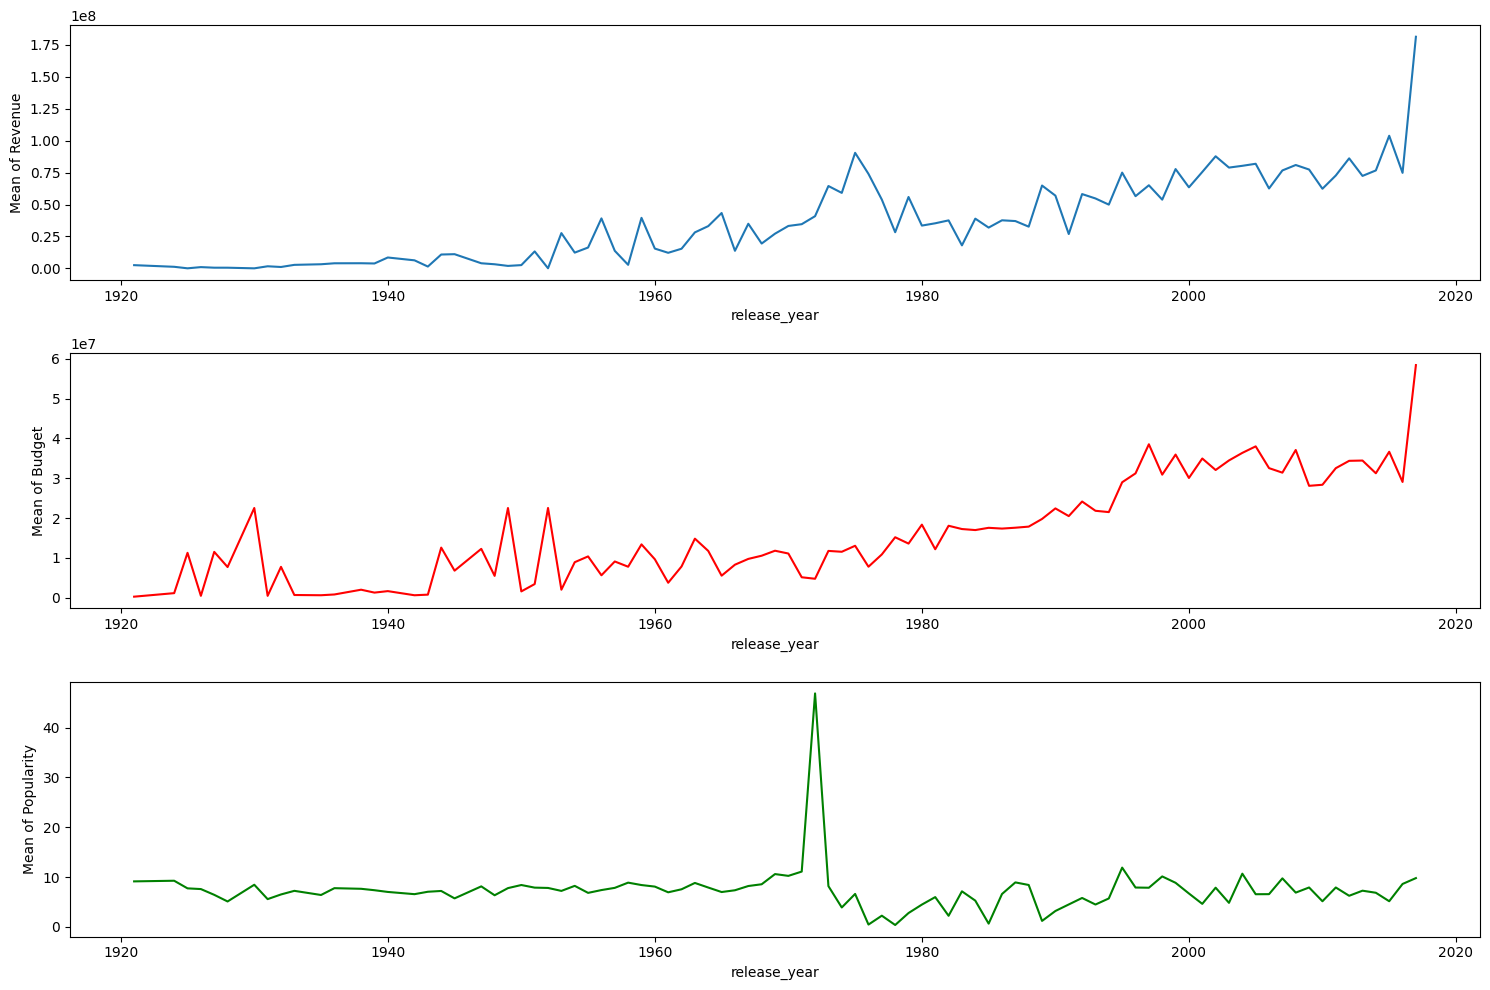

In [1764]:
year_data = train_data.groupby("release_year")[["revenue","budget","popularity","runtime"]].mean().reset_index()
plt.figure(figsize=(13,6))
fig , ax = plt.subplots(3,1,figsize = (15,10))
ax1 = sns.lineplot(x=year_data["release_year"],y=year_data["revenue"],ax=ax[0])
ax1.set_ylabel("Mean of Revenue")
ax2 = sns.lineplot(x=year_data["release_year"],y=year_data["budget"],color="r",ax=ax[1])
ax2.set_ylabel("Mean of Budget")
ax3 = sns.lineplot(x=year_data["release_year"],y=year_df["popularity"],color="g",ax=ax[2])
ax3.set_ylabel("Mean of Popularity")
plt.tight_layout()

In [1765]:
train_data.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,production_country_Hungary,production_country_United Arab Emirates,production_country_Austria,production_country_Switzerland,production_country_Romania
0,1,Hot Tub Time Machine Collection,14000000.00,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,The Princess Diaries Collection,40000000.00,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,0,0,0,0
2,3,Whiplash Collection,3300000.00,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0
3,4,Kahaani Collection,1200000.00,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,0,0,0
4,5,Marine Boy Collection,22531334.11,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,0,0,0
5,6,Pinocchio and the Emperor of the Night Collection,8000000.00,"[Animation, Adventure, Family]",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,0,0,0,0,0,0,0,0,0,0
6,7,The Possession Collection,14000000.00,"[Horror, Thriller]",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,0,0,0,0,0,0,0,0,0,0
7,8,Control Room Collection,22531334.11,[Documentary],NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,0,0,0,0,0,0,0,0,0,0
8,9,The Muppet Collection,22531334.11,"[Action, Comedy, Music, Family, Adventure]",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,0,0,0,0,0,0,0,0,0,0
9,10,A Mighty Wind Collection,6000000.00,"[Comedy, Music]",NaN,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,...,0,0,0,0,0,0,0,0,0,0


In [1766]:

list_of_genres = list(train_data['genres'])
# Create all_genres column with all genres
train_data['all_genres'] = train_data['genres'].apply(lambda x: ' '.join(sorted(x)) if x != {} else '')
# Create genres_[genre name] column with 1 if movie has this genre and 0 if not
train_data["genre_count"] = train_data["genres"].apply(lambda x: len(x))
# train_data['all_genres'] = train_data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train_data['genre_' + g] = train_data['all_genres'].apply(lambda x: 1 if g in x else 0)


test_data["genre_count"] = test_data["genres"].apply(lambda x: len(x))
test_data['all_genres'] = test_data['genres'].apply(lambda x: ' '.join(sorted(x)) if x != {} else '')
# test_data['all_genres'] = test_data['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test_data['genre_' + g] = test_data['all_genres'].apply(lambda x: 1 if g in x else 0)

train_data.head(10)

/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/1882716432.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data["genre_count"] = test_data["genres"].apply(lambda x: len(x))
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/1882716432.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['all_genres'] = test_data['genres'].apply(lambda x: ' '.join(sorted(x)) if x != {} else '')
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/1882716432.py:16: PerformanceWarning: 

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music
0,1,Hot Tub Time Machine Collection,14000000.00,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,The Princess Diaries Collection,40000000.00,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,1,0,0,0,0,0
2,3,Whiplash Collection,3300000.00,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0
3,4,Kahaani Collection,1200000.00,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,0,0,0
4,5,Marine Boy Collection,22531334.11,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,0,0,0
5,6,Pinocchio and the Emperor of the Night Collection,8000000.00,"[Animation, Adventure, Family]",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,0,1,0,0,1,0,0,1,0,0
6,7,The Possession Collection,14000000.00,"[Horror, Thriller]",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,0,0,1,0,0,0,0,0,0,0
7,8,Control Room Collection,22531334.11,[Documentary],NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,0,0,0,0,0,0,0,0,0,0
8,9,The Muppet Collection,22531334.11,"[Action, Comedy, Music, Family, Adventure]",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,0,1,0,0,1,0,0,0,0,1
9,10,A Mighty Wind Collection,6000000.00,"[Comedy, Music]",NaN,tt0310281,en,A Mighty Wind,"In ""A Mighty Wind"", director Christopher Guest...",4.672036,...,0,0,0,0,0,0,0,0,0,1


In [1767]:
test_data['genre_count'].head(10)

0    4
1    2
2    2
3    3
4    2
5    2
6    3
7    2
8    2
9    3
Name: genre_count, dtype: int64

In [1768]:
# all columns in list of columnx
list_of_columns = list(train_data.columns)
list_of_columns


['id',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue',
 'release_month',
 'release_day',
 'release_year',
 'release_dayofweek',
 'release_quarter',
 'languages_count',
 'all_languages',
 'language_English',
 'language_Français',
 'language_Español',
 'language_Deutsch',
 'language_Pусский',
 'language_Italiano',
 'language_日本語',
 'language_普通话',
 'language_हिन्दी',
 'language_',
 'language_Português',
 'language_العربية',
 'language_한국어/조선말',
 'language_广州话 / 廣州話',
 'language_தமிழ்',
 'language_Polski',
 'language_Magyar',
 'language_Latin',
 'language_svenska',
 'language_ภาษาไทย',
 'language_Český',
 'language_עִבְרִית',
 'language_ελληνικά',
 'language_Türkçe',
 'language_Dansk',
 'language_Nederlands'

In [1769]:
columns_to_drop=["all_genres","all_languages","all_production_companies","belongs_to_collection","genres","homepage","imdb_id","status","original_title","overview","poster_path","production_companies","production_countries","all_production_countries" ,"release_date","spoken_languages","tagline","title","Keywords","cast","crew"]
train_data.drop(columns_to_drop,axis=1,inplace=True)
test_data.drop(columns_to_drop,axis=1,inplace=True)

In [1770]:
test_data.isnull().sum()
test_data["runtime"].fillna(test_data["runtime"].mean(),inplace=True)

## Label Encoding

In [1771]:
label = LabelEncoder()
train_data["original_language"] = label.fit_transform(train_data["original_language"])
test_data["original_language"] = label.fit_transform(test_data["original_language"])


In [1772]:
# Replace NaN with mean in runtime
train_data['runtime'] = train_data['runtime'].fillna(train_data['runtime'].mean())
test_data['runtime'] = test_data['runtime'].fillna(test_data['runtime'].mean())


In [1773]:
# Replace NaN with mean in popularity
train_data['popularity'] = train_data['popularity'].fillna(train_data['popularity'].mean())
test_data['popularity'] = test_data['popularity'].fillna(test_data['popularity'].mean())

In [1774]:
train_data['budget_to_popularity'] = (train_data['budget'] / train_data['popularity'])/100000
train_data['budget_to_runtime'] = (train_data['budget'] / train_data['runtime'])/100000
##TEST
test_data['budget_to_popularity'] = (test_data['budget'] / test_data['popularity'])/100000
test_data['budget_to_runtime'] = (test_data['budget'] / test_data['runtime'])/100000

/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/1335995203.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['budget_to_popularity'] = (test_data['budget'] / test_data['popularity'])/100000
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_75286/1335995203.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data['budget_to_runtime'] = (test_data['budget'] / test_data['runtime'])/100000


In [1775]:
train_data['budget_to_popularity'] = label.fit_transform(train_data['budget_to_popularity'])
test_data['budget_to_popularity'] = label.fit_transform(test_data['budget_to_popularity'])

In [1776]:
train_data['budget_to_runtime'] = label.fit_transform(train_data['budget_to_runtime'])

test_data['budget_to_popularity'] = label.fit_transform(test_data['budget_to_popularity'])
test_data['budget_to_runtime'] = label.fit_transform(test_data['budget_to_runtime'])

In [1777]:
X = train_data.drop(['revenue'], axis=1)
y = train_data['revenue']

## Time for Prediction 

In [1778]:
# Split the data into training 
# testing sets test_size = 0.3 => 30% of data for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1779]:
import math

def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

In [1780]:
train_data.head(10)
train_data.to_csv("train_data.csv",index=False)

In [1781]:
# Check NAN values
train_data.isnull().sum()

train_data.describe()

,id,budget,original_language,popularity,runtime,revenue,release_month,release_day,release_year,release_dayofweek,...,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,budget_to_popularity,budget_to_runtime
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.862982e+07,8.299333,8.463274,107.856571,6.672585e+07,6.775333,15.046333,1999.713000,3.250333,...,0.100333,0.096667,0.086667,0.077333,0.075000,0.047000,0.044000,0.033333,1499.482667,896.874000
std,866.169729,3.458720e+07,4.626107,12.104000,22.079069,1.375323e+08,3.409115,8.632981,15.423313,1.331762,...,0.300494,0.295553,0.281393,0.267164,0.263435,0.211674,0.205129,0.179535,866.140232,415.866566
min,1.000000,1.000000e+00,0.000000,0.000001,0.000000,1.000000e+00,1.000000,1.000000,1921.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,9.000000e+06,7.000000,4.018053,94.000000,2.379808e+06,4.000000,8.000000,1993.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,749.750000,592.750000
50%,1500.500000,2.253133e+07,7.000000,7.374861,104.000000,1.680707e+07,7.000000,15.000000,2004.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1499.500000,979.500000
75%,2250.250000,2.900000e+07,7.000000,10.890983,118.000000,6.891920e+07,10.000000,22.000000,2011.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2249.250000,1147.000000
max,3000.000000,3.800000e+08,35.000000,294.337037,338.000000,1.519558e+09,12.000000,31.000000,2017.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2998.000000,1686.000000


In [1782]:
# Replace inf with 0
train_data = train_data.replace([np.inf, -np.inf], 0)

In [1783]:
# Highest value in each column
train_data.max()

id                      3.000000e+03
budget                  3.800000e+08
original_language       3.500000e+01
popularity              2.943370e+02
runtime                 3.380000e+02
                            ...     
genre_Animation         1.000000e+00
genre_History           1.000000e+00
genre_Music             1.000000e+00
budget_to_popularity    2.998000e+03
budget_to_runtime       1.686000e+03
Length: 123, dtype: float64

In [1784]:
# linear regression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Coefficients: \n', model.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('RSE: %.2f'
        % RSE(y_test, y_pred))



Coefficients: 
 [-2.44719212e+03  3.14408879e+00 -7.14309718e+05  2.38368439e+06
  2.64198219e+05  5.35434915e+06  1.55866354e+05  1.94429122e+05
 -4.42844332e+06 -1.70871658e+07 -3.90105762e+06 -1.35466561e+07
 -3.26570370e+06 -4.87553227e+05 -7.23816189e+06  1.52757400e+07
  9.05541048e+06 -2.22669763e+07  2.30224073e+07 -1.54224848e+07
  1.05634332e-04 -3.44690298e+06  1.79932438e+06 -5.33780959e+06
 -6.10405005e+06 -1.55187232e+07 -6.75107554e+06 -2.69264213e+07
  5.64216361e+07  2.77676809e+07  3.90970459e+05 -1.05950581e+07
  2.38159838e+07  6.52374761e+07 -2.65879136e+07 -1.67173332e+07
  4.14300320e+06  1.16468161e+06  5.77987674e+07 -8.61110653e+06
  1.42215933e+07  9.74373909e+05 -4.27575353e+05 -1.00375138e+06
  1.62166326e+07  3.02819452e+07  1.64254634e+07 -4.29844150e+06
 -7.06782476e+06  4.57535925e+07 -6.69046285e+06 -3.79208649e+05
  8.60088538e+06  1.25017137e+07 -1.20289544e+07  1.55979717e+07
  8.42584407e+06 -2.08936406e+07 -1.18252539e+07 -6.28784093e+06
 -2.96911

In [1785]:
# Accuracy of model
print('Accuracy: %.2f' % model.score(X_test, y_test))

Accuracy: 0.53


In [1786]:
# Replace NaN values with 0
test_data = test_data.fillna(0)


In [1787]:
# Print Columns with NaN values
test_data.columns[test_data.isna().any()].tolist()




[]

In [1788]:
# predict test data
y_pred_test = model.predict(test_data)

y_pred_test


array([-6162882.7363221 , -5551768.90210932, 14592525.1792618 , ...,
       27131065.05853599, 50275541.11669517, 21005704.13936526])

In [1789]:
results = pd.DataFrame({'id': test_data.index, 'revenue': y_pred_test})
results.to_csv('submission.csv', index=False)

In [1790]:
results.tail(10)

,id,revenue
4388,4388,-3.141350e+07
4389,4389,-4.300299e+07
4390,4390,-2.819155e+07
4391,4391,-7.146589e+06
4392,4392,4.782127e+08
4393,4393,2.901624e+07
4394,4394,1.822458e+07
4395,4395,2.713107e+07
4396,4396,5.027554e+07
4397,4397,2.100570e+07


=> Models to use
Use Ensemble Models 

=> Add additional features 
    1) Budget rations
    2) Popularity ratios
    3) IMDB ratings

In [1791]:
# Ensable model XGBoost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('RSE: %.2f'
        % RSE(y_test, y_pred))
print('Accuracy: %.2f' % model.score(X_test, y_test))


Mean squared error: 7029792096353874.00
RSE: 83937170.84
Accuracy: 0.55


In [1792]:
# Random Forest

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
print('RSE: %.2f'
        % RSE(y_test, y_pred))
print('Accuracy: %.2f' % model.score(X_test, y_test))


pred = model.predict(test_data)
result = pd.DataFrame({'id': test_data['id'], 'revenue': pred})
result.to_csv('submission.csv', index=False)


Mean squared error: 6469503498141207.00
RSE: 80522743.32
Accuracy: 0.58


In [1793]:
# DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
print('RSE: %.2f'
        % RSE(y_test, y_pred))
print('Accuracy: %.2f' % model.score(X_test, y_test))

Mean squared error: 10685363991400364.00
RSE: 103485081.68
Accuracy: 0.31
